In [168]:
import ollama
import json
import requests
import subprocess

In [172]:
def run_code_with_shell_commands(code_string,messages):
    code_to_run = ""
    # Split the code string into lines
    lines = code_string.splitlines()
    
    # Iterate through each line
    for line in lines:
        if line.strip().startswith("!"):  # Identify lines that start with !
            # Extract the shell command by removing the leading '!'
            shell_command = line.strip()[1:].strip()
            print("EXECUTE GENERATED SHELL CODE")
            print(shell_command)
            
            # Execute the shell command
            subprocess.run(shell_command, shell=True, check=True)
        else:
            # Execute the Python code
            code_to_run += '\n' + line
    print("EXECUTE GENERATED CODE")
    print(code_to_run)
    try:
        exec(code_to_run)
    except BaseException as e:
        print("EXCEPTION")
        user_input = "I ran this" + code_to_run + "and got this error" + str(e) + ". Can you fix and reply with the Python code so I can try running it again?"
        messages.append({"role": "user", "content": user_input})
        message = chat(messages)
        messages.append(message)
        run_python_code(message["content"],messages)

In [174]:
def run_python_code(message_data,messages):
    python_code_blocks = message_data.count("```python")

    print(python_code_blocks)
    
    start_string_num = 0
    for i in range(python_code_blocks):
        # Find the start and end of the next code block
        start_index = message_data.find("```python", start_string_num) + 9
        end_index = message_data.find("```", start_index)
        
        # Extract the code block
        code_string = message_data[start_index:end_index]
        
        # Update the start position for the next iteration
        start_string_num = end_index + 3
        
        # Run the code with shell command handling
        run_code_with_shell_commands(code_string,messages)

Enter a prompt:  Can you create Python code to generate data and run a matrix completion algorithm on it? Include code to install any Python packages you need using exclamation point syntax. The environment is a Jupyter Notebook.



6.734050750732422
Here's an example of how to generate a matrix, complete missing entries using the Alternating Least Squares (ALS) algorithm, and visualize the results in a Jupyter Notebook.

First, let's install the necessary packages:

```python
!pip install numpy pandas scikit-learn matplotlib ipywidgets
```

Now, we can create Python code to generate data and run the matrix completion algorithm:

```python
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import pandas as pd
from scipy.sparse.linalg import svds
from matplotlib import pyplot as plt

# Set a seed for reproducibility
np.random.seed(0)

# Generate data
n_users = 100
n_items = 50
num_entries_per_user = 10

# Create an empty user-item interaction matrix with mostly zeros
interactions = np.zeros((n_users, n_items))

# Simulate user-item interactions (ratings) by filling in a few entries per user
for i in range(n_users):
    items = np.random.choice(n_items, num_entri

<Figure size 800x600 with 0 Axes>

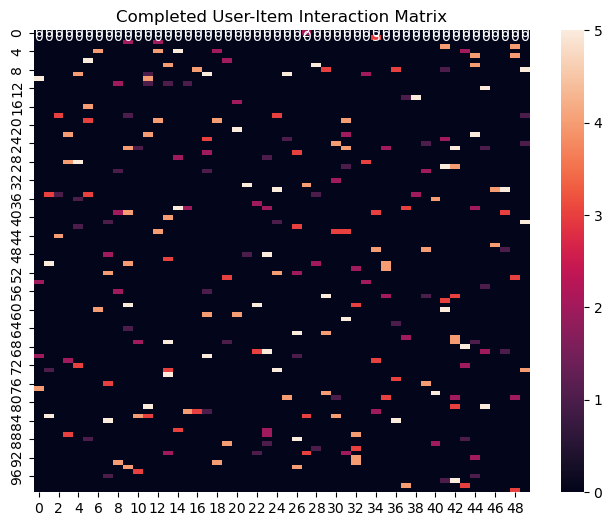


Mean Squared Error: 1.639
EXCEPTION
107.61305212974548
The issue is that `svds` is a function from the `scipy.sparse.linalg` module, but you've imported it as `from scipy.sparse.linalg import svds`, which makes it accessible directly.

However, in your original code, you've imported `svds` with `from scipy.sparse.linalg import svds`. The correct way to import `svds` is by importing the entire module and then using it directly:

```python
from scipy.sparse.linalg import svds
```

Here's the corrected code:

```python
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seed for reproducibility
np.random.seed(0)

# Generate data
n_users = 100
n_items = 50
num_entries_per_user = 10

# Create an empty user-item interaction matrix with mostly zeros
interactions = np.zeros((n_users, n_items))

# Simulate user-item interactions (ratings) by filling in a few en

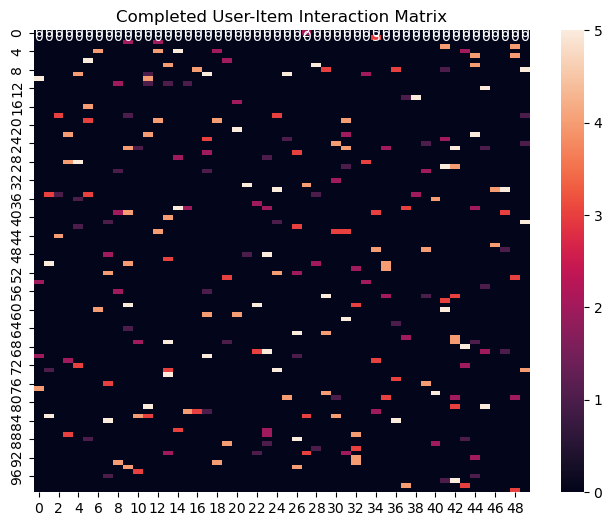


Mean Squared Error: 1.639

Completed Interaction Matrix using SVD:
[[ 0.36997279  0.33275598  1.42621516 ...  0.33133202 -0.13717023
   0.70500329]
 [ 0.06436179  0.37553302  0.61533858 ...  0.84558685  0.10902689
   0.28912352]
 [ 0.61700764  0.4825701   1.15615819 ...  0.60326981  0.77376502
   0.36665442]
 ...
 [ 0.20183506  0.966828    0.62552512 ... -0.52355909  2.45323464
  -0.5982566 ]
 [-0.53504595  1.30567647  0.48265521 ...  0.56299944 -0.08267557
  -0.29546172]
 [ 0.89641647  0.9119398   1.75955594 ... -0.15078439  0.92800161
  -0.21672892]]


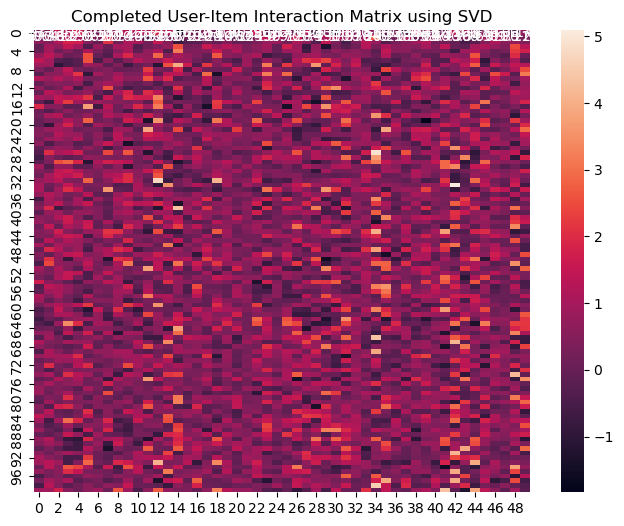


Mean Squared Error (SVD): 1.0601002463024225





In [ ]:
# NOTE: ollama must be running for this to work, start the ollama app or run `ollama serve`
model = "llama3.1"  # TODO: update this for whatever model you wish to use

def chat(messages):
    start_time = time.time()
    token_count = 0
    r = requests.post(
        "http://0.0.0.0:11434/api/chat",
        json={"model": model, "messages": messages, "stream": True},
	stream=True
    )
    r.raise_for_status()
    output = ""

    for line in r.iter_lines():
        body = json.loads(line)
        if "error" in body:
            raise Exception(body["error"])
        if body.get("done") is False:
            message = body.get("message", "")
            content = message.get("content", "")
            if output == "":
                print(time.time() - start_time)
                start_time = time.time()
            output += content
            token_count += 1
            # the response streams one token at a time, print that as we receive it
            print(content, end="", flush=True)

        if body.get("done", False):
            message["content"] = output
            #end_time = time.time()
            #print(end_time - start_time)
            #print(token_count)
            #print(token_count/(end_time - start_time))
            return message


def main():
    messages = []

    while True:
        user_input = input("Enter a prompt: ")
        if not user_input:
            exit()
        print()
        messages.append({"role": "user", "content": user_input})
        message = chat(messages)
        messages.append(message)

        run_python_code(message["content"],messages)

        print("\n\n")


if __name__ == "__main__":
    main()

Can you create Python code to generate data and run a matrix completion algorithm on it? Include code to install any Python packages you need using exclamation point syntax. The environment is a Jupyter Notebook.